<a href="https://colab.research.google.com/github/arfandiTelU/Skripsi/blob/master/Cnn_Klasifikasi_Bibit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Menghubungkan Dengan Google Drive

In [64]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Install Library

In [0]:
!pip install -q keras
!pip install opencv-contrib-python

Import Library

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow_hub as hub

Mengambil, Memproses, Dan Membagi Data

In [66]:
train_dir = '/content/gdrive/My Drive/Dataset/Train'
test_dir = '/content/gdrive/My Drive/Dataset/Test'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.12)
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=.12)
test_datagen = ImageDataGenerator(rescale=1./255)

IMAGE_SHAPE = (224,224)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset = "training",
    shuffle = True,
    target_size = IMAGE_SHAPE,
    batch_size = 20
)

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    subset = "validation",
    shuffle = True,
    target_size = IMAGE_SHAPE,
    batch_size = 20
)

Found 510 images belonging to 5 classes.
Found 65 images belonging to 5 classes.


In [114]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Cabai' 'Pakcoy' 'Sawi' 'Terong' 'Tomat']


Membangun Arsitektur Model

In [67]:
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (512,512,3)))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Flatten())

# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(512, activation = 'relu'))

# model.add(layers.Dense(5, activation = 'softmax'))

model = models.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  layers.Dropout(0.4),
  layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   multiple                  2257984   
_________________________________________________________________
dropout_15 (Dropout)         multiple                  0         
_________________________________________________________________
dense_33 (Dense)             multiple                  6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(
  # optimizer=optimizers.RMSprop(lr=1e-4),
  optimizer=optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [72]:
history = model.fit(
    train_generator, 
    epochs = 20,
    steps_per_epoch = 26,
    validation_data=valid_generator,
    validation_steps = 4)

Epoch 1/20
26/26 [==============================] - 16s 605ms/step - loss: 0.9154 - acc: 0.6431 - val_loss: 0.6716 - val_acc: 0.7846
Epoch 2/20
26/26 [==============================] - 16s 603ms/step - loss: 0.7530 - acc: 0.7078 - val_loss: 0.5267 - val_acc: 0.8462
Epoch 3/20
26/26 [==============================] - 16s 600ms/step - loss: 0.5718 - acc: 0.7961 - val_loss: 0.5472 - val_acc: 0.8308
Epoch 4/20
26/26 [==============================] - 15s 589ms/step - loss: 0.5125 - acc: 0.8078 - val_loss: 0.5345 - val_acc: 0.8000
Epoch 5/20
26/26 [==============================] - 15s 596ms/step - loss: 0.4765 - acc: 0.8333 - val_loss: 0.4843 - val_acc: 0.8308
Epoch 6/20
26/26 [==============================] - 16s 619ms/step - loss: 0.4573 - acc: 0.8294 - val_loss: 0.4927 - val_acc: 0.8154
Epoch 7/20
26/26 [==============================] - 16s 632ms/step - loss: 0.3782 - acc: 0.8667 - val_loss: 0.5172 - val_acc: 0.7846
Epoch 8/20
26/26 [==============================] - 16s 608ms/step - 

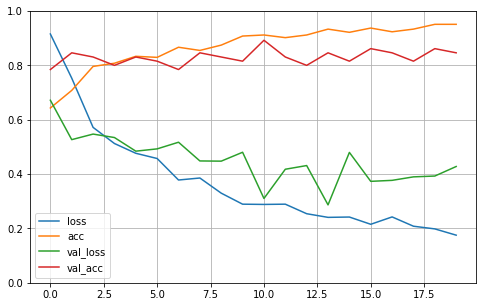

In [73]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [132]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SHAPE,
    batch_size = 20
)

evaluate = model.evaluate(test_generator, steps = 4)

predict = model

Found 65 images belonging to 5 classes.
4/4 [==============================] - 1s 283ms/step - loss: 0.5363 - acc: 0.8308


In [139]:
print(evaluate)
# test_image_batch, test_label_batch = next(iter(test_generator))
# true_label_ids = np.argmax(test_label_batch, axis=-1)
# print(true_label_ids)
# plt.figure(figsize=(10,9))
# plt.subplots_adjust(hspace=0.5)
# for n in range(3):
#   plt.subplot(6,5,n+1)
#   plt.imshow(val_image_batch[n])
#   color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
#   plt.title(predicted_labels[n].title(), color=color)
#   plt.axis('off')
# _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

[0.5363028645515442, 0.8307692408561707]
